`cd project/seniorthesis/notebooks`

`conda list PyCO2SYS`

`pip install PyCO2SYS`

`pip install git+https://github.com/jbusecke/cmip6_preprocessing.git`

`mv *.png ../figures`

In [3]:
from scipy.io import loadmat
import xarray as xr
import xesmf as xe
from cmip6_preprocessing.preprocessing import combined_preprocessing
import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from cmip6_preprocessing.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.path as mpath
from cmip6_preprocessing.postprocessing import combine_datasets
from cmip6_preprocessing.postprocessing import merge_variables
from dask.diagnostics import ProgressBar
from xgcm import Grid
from xhistogram.xarray import histogram
import pandas as pd
from scipy.io import netcdf
import netCDF4 as nc


In [9]:
haumann = loadmat('glodapv2_2016b_mapped_ppco2_gamman.mat')
lev = haumann['dpth']
gamman = haumann['gamman']
lat = haumann['lat']
lon = haumann['lon']
ppco2 = haumann['ppco2']
vol = haumann['vol']

In [10]:
da = xr.DataArray(data=ppco2,
            dims=["x", "y", "lev"],
            coords=dict(x=lon[:,0,0], 
                        y=lat[0,:,0], 
                        lev=lev[0,0,:])
            )
da = da.roll(x = 20, roll_coords = True)

In [13]:
da.sel(x=slice(180,200)).mean(['x'],keep_attrs=True)

<xarray.DataArray (y: 180, lev: 33)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan, 322.05005586,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) uint16 0 10 20 30 50 75 100 ... 3000 3500 4000 4500 5000 5500

<ipython-input-46-3385c9e7250c>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(d2.y, d2.lev,d2, vmin = 350, vmax = 600)


Text(53.625, 0.5, 'Depth (m)')

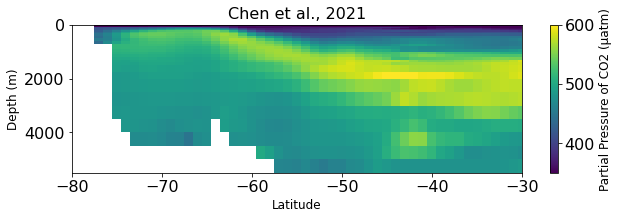

In [46]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=[10,4])
fig.tight_layout(pad = 3.5)
plt.rc('font', size = 16)
plt.rc('axes', titlesize= 16)    
plt.rc('axes', labelsize= 12)
plt.rc('figure', titlesize=14)


ds = da.sel(x=slice(180,200)).mean(['x'],keep_attrs=True)


ax.set_xlim([-80,-30])
im = ax.pcolormesh(d2.y, d2.lev,d2, vmin = 350, vmax = 600)
cbar = plt.colorbar(im,ax=ax)
ax.invert_yaxis()
cbar.set_label('Partial Pressure of CO2 (\u03BCatm)')
ax.set_title('Chen et al., 2021')
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
# ax_idx += 1

In [34]:
d2 = ds.transpose('lev','y')
d2

<xarray.DataArray (lev: 33, y: 180)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ..., 322.05005586,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) uint16 0 10 20 30 50 75 100 ... 3000 3500 4000 4500 5000 5500

In [33]:
help(pcolormesh)

NameError: name 'pcolormesh' is not defined